## BCIS 5110 Analysis of JD Data

In [63]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### We will analyze JD Data in the rest of our assignments.
The objective: to build models to accurately predict delivery times for customer orders.<br>
The data: We need the following tables from the JD.com data<br>
        1. Order<br>
        2. User<br>
        3. Delivery<br>
        4. Inventory<br>
        5. Network<br>        

#### Assignment 8 include Q1 - Q10.

1. Import necessary packages.

In [64]:
import pandas as pd
import numpy as np

2. Read in the five csv files.

In [65]:
order = pd.read_csv("JD_order_data.csv")

In [66]:
user = pd.read_csv("JD_user_data.csv")

In [67]:
delivery = pd.read_csv("JD_delivery_data.csv")

In [68]:
inventory = pd.read_csv("JD_inventory_data.csv")

In [69]:
network = pd.read_csv("JD_network_data.csv")

3. Display a sample of each data frame. How many observations? How many columns? What are the column names? (Use code to display such information.)

In [70]:
order.head()

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des
0,d0cf5cc6db,0abe9ef2ce,581d5b54c1,2018-03-01,2018-03-01 17:14:25.0,1,2,-,89.0,79.0,0.0,10.0,0.0,0.0,0,4,28
1,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,5.0,41.0,0.0,0.0,0,28,28
2,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,19.5,0.0,0.0,0.0,0,28,28
3,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,0.0,26.0,0.0,0.0,0,4,28
4,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,19.0,0.0,0.0,6.0,0,3,16


In [71]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549989 entries, 0 to 549988
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_ID                    549989 non-null  object 
 1   user_ID                     549989 non-null  object 
 2   sku_ID                      549989 non-null  object 
 3   order_date                  549989 non-null  object 
 4   order_time                  549989 non-null  object 
 5   quantity                    549989 non-null  int64  
 6   type                        549989 non-null  int64  
 7   promise                     549989 non-null  object 
 8   original_unit_price         549989 non-null  float64
 9   final_unit_price            549989 non-null  float64
 10  direct_discount_per_unit    549989 non-null  float64
 11  quantity_discount_per_unit  549989 non-null  float64
 12  bundle_discount_per_unit    549989 non-null  float64
 13  coupon_discoun

In [72]:
order.columns

Index(['order_ID', 'user_ID', 'sku_ID', 'order_date', 'order_time', 'quantity',
       'type', 'promise', 'original_unit_price', 'final_unit_price',
       'direct_discount_per_unit', 'quantity_discount_per_unit',
       'bundle_discount_per_unit', 'coupon_discount_per_unit', 'gift_item',
       'dc_ori', 'dc_des'],
      dtype='object')

In [73]:
user.head()

,user_ID,user_level,first_order_month,plus,gender,age,marital_status,education,city_level,purchase_power
0,000089d6a6,1,2017-08,0,F,26-35,S,3,4,3
1,0000babd1f,1,2018-03,0,U,U,U,-1,-1,-1
2,0000bc018b,3,2016-06,0,F,>=56,M,3,2,3
3,0000d0e5ab,3,2014-06,0,M,26-35,M,3,2,2
4,0000dce472,3,2012-08,1,U,U,U,-1,-1,-1


In [74]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457298 entries, 0 to 457297
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_ID            457298 non-null  object
 1   user_level         457298 non-null  int64 
 2   first_order_month  457298 non-null  object
 3   plus               457298 non-null  int64 
 4   gender             457298 non-null  object
 5   age                457298 non-null  object
 6   marital_status     457298 non-null  object
 7   education          457298 non-null  int64 
 8   city_level         457298 non-null  int64 
 9   purchase_power     457298 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 34.9+ MB


In [75]:
user.columns

Index(['user_ID', 'user_level', 'first_order_month', 'plus', 'gender', 'age',
       'marital_status', 'education', 'city_level', 'purchase_power'],
      dtype='object')

In [76]:
delivery.head()

,package_ID,order_ID,type,ship_out_time,arr_station_time,arr_time
0,dc3d6d2258,dc3d6d2258,1,2018-03-01 08:00:00,2018-03-01 15:00:00,2018-03-01 18:00:00
1,19802a570c,19802a570c,1,2018-03-01 10:00:00,2018-03-01 15:00:00,2018-03-01 17:00:00
2,e22627af66,e22627af66,1,2018-03-01 11:00:00,2018-03-01 15:00:00,2018-03-01 17:00:00
3,50d11a586d,50d11a586d,1,2018-03-01 10:00:00,2018-03-01 16:00:00,2018-03-01 19:00:00
4,a3bfe38bf4,a3bfe38bf4,1,2018-03-01 11:00:00,2018-03-01 16:00:00,2018-03-01 17:00:00


In [77]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293229 entries, 0 to 293228
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   package_ID        293229 non-null  object
 1   order_ID          293229 non-null  object
 2   type              293229 non-null  int64 
 3   ship_out_time     293229 non-null  object
 4   arr_station_time  293229 non-null  object
 5   arr_time          293229 non-null  object
dtypes: int64(1), object(5)
memory usage: 13.4+ MB


In [78]:
delivery.columns

Index(['package_ID', 'order_ID', 'type', 'ship_out_time', 'arr_station_time',
       'arr_time'],
      dtype='object')

In [79]:
inventory.head()

,dc_ID,sku_ID,date
0,9,50f6f91962,2018-03-01
1,9,7f0ddbcdde,2018-03-01
2,9,8ad5789d74,2018-03-01
3,9,468d34eda4,2018-03-01
4,9,460afaddb6,2018-03-01


In [80]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136079 entries, 0 to 136078
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   dc_ID   136079 non-null  int64 
 1   sku_ID  136079 non-null  object
 2   date    136079 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.1+ MB


In [81]:
inventory.columns

Index(['dc_ID', 'sku_ID', 'date'], dtype='object')

In [82]:
network.head()

,region_ID,dc_ID
0,2,57
1,2,43
2,2,42
3,2,66
4,2,20


In [83]:
network.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   region_ID  56 non-null     int64
 1   dc_ID      56 non-null     int64
dtypes: int64(2)
memory usage: 1.0 KB


In [84]:
network.columns

Index(['region_ID', 'dc_ID'], dtype='object')

4. Check for missing values of columns of each dataframe. You can use sum() (instead of any()) to find out the number of missing values. Which variables have missing values?

In [85]:
#Here we have defined a list "missing_values" where we have kept 3 values ["n/a", "na", "-"].
#The intention towards taking only these 3 values is that in general the missing values in any dataframe might be n/a,na,-
#Particulary observing the datasets we have the missing values in order table are "-" in one of the column.

missing_values = ["n/a", "na", "-"]
#The below code creates a dataframe df where we read the csv file again with na_values parameter is set to the "missing_values" list. This parameter specifies the list of strings to be considered as missing values when reading the CSV file. Any cell in the CSV file containing one of these strings will be converted to NaN in the DataFrame

df = pd.read_csv("JD_order_data.csv", na_values = missing_values)


missing_values_order = df.isnull().sum()
print(missing_values_order)
#isnull() method is used to check each cell in the DataFrame and returns True for missing values (NaN) and False for non-missing values
#The .sum() method is then used to count the number of True values (missing values) in each column.

#Here we are using  is a variable "variables_with_missing_values_order" that represents a filtered DataFrame containing information about missing values in each column of the original DataFrame
#Breaking down the code missing_values_order > 0 creates a Boolean DataFrame where each element is True if the corresponding element in the missing_values_order DataFrame is greater than 0, indicating that there are missing values in that column

variables_with_missing_values_order = missing_values_order[missing_values_order > 0]
print("\nvariables with missing values order")
print(variables_with_missing_values_order)

order_ID                           0
user_ID                            0
sku_ID                             0
order_date                         0
order_time                         0
quantity                           0
type                               0
promise                       208583
original_unit_price                0
final_unit_price                   0
direct_discount_per_unit           0
quantity_discount_per_unit         0
bundle_discount_per_unit           0
coupon_discount_per_unit           0
gift_item                          0
dc_ori                             0
dc_des                             0
dtype: int64

variables with missing values order
promise    208583
dtype: int64


In [86]:
missing_values = ["n/a", "na", "-"]
df2 = pd.read_csv("JD_user_data.csv", na_values = missing_values)
missing_values_user = df2.isnull().sum()
print(missing_values_user)

variables_with_missing_values_user = missing_values_user[missing_values_user > 0]
print("\nvariables with missing values order")
print(variables_with_missing_values_user)

user_ID              0
user_level           0
first_order_month    0
plus                 0
gender               0
age                  0
marital_status       0
education            0
city_level           0
purchase_power       0
dtype: int64

variables with missing values order
Series([], dtype: int64)


In [87]:
missing_values = ["n/a", "na", "-"]
df3 = pd.read_csv("JD_delivery_data.csv", na_values = missing_values)
missing_values_delivery = df3.isnull().sum()
print(missing_values_delivery)

variables_with_missing_values_delivery = missing_values_delivery[missing_values_delivery > 0]
print("\nvariables with missing values delivery")
print(variables_with_missing_values_delivery)

package_ID          0
order_ID            0
type                0
ship_out_time       0
arr_station_time    0
arr_time            0
dtype: int64

variables with missing values delivery
Series([], dtype: int64)


In [88]:
missing_values = ["n/a", "na", "-"]
df4 = pd.read_csv("JD_inventory_data.csv", na_values = missing_values)
missing_values_inventory = df4.isnull().sum()
print(missing_values_inventory)

variables_with_missing_values_inventory = missing_values_inventory[missing_values_inventory > 0]
print("\nvariables with missing values inventory")
print(variables_with_missing_values_inventory)

dc_ID     0
sku_ID    0
date      0
dtype: int64

variables with missing values inventory
Series([], dtype: int64)


In [89]:
missing_values = ["n/a", "na", "-"]
df5 = pd.read_csv("JD_network_data.csv", na_values = missing_values)
missing_values_network = df5.isnull().sum()
print(missing_values_network)

variables_with_missing_values_network = missing_values_network[missing_values_network > 0]
print("\nvariables with missing values network")
print(variables_with_missing_values_network)

region_ID    0
dc_ID        0
dtype: int64

variables with missing values network
Series([], dtype: int64)


5. Check the promise variable in orders table. What unusual values do you notice? What do you think it means?

In [90]:
#The code to check promise variable in orders table we use a method called ".unique()"
#Coming to the code "order['promise'].unique()" we are using the unique() method on orders table specifying the Column name ['Promise']
unique_promise_values = order['promise'].unique()
print(unique_promise_values)

#After running the code we get a list of unique values in the promise column which we can observe in the output
#According to the document provided by JD company the meaning of column promise is "Expected delivery time (in days)" ranging from min of 1 day to maximum of 8 days.
#There is unusual value in the list "-" which indicates a missing or unspecified value, which means the expected delivery time cannot be estimated.

['-' '2' '1' '3' '4' '5' '6' '7' '8']


6. How many observations for each value in 'promise' variable? What information can you draw from this?

In [91]:
promise_counts = order['promise'].value_counts()
print(promise_counts)
#breaking down the code
#promise_counts is a variable used to store the result of counting the occurrences of each unique value in the 'promise' column
#order['promise'] is DataFrame indexing where it extracts specific column from a dataframe
#.value_counts() is a pandas Series method that counts the occurrences of each unique value in the Series. It returns a new Series with the unique values as the index and the counts as the values.

#The information we can observe from this that the "Estimated delivery times" with "-" values are more because the delivery time cannot be estimated and the second place goes to 1 day delivery which is highest.

-    208583
1    157509
2    109990
3     33176
4     23882
5     10054
6      3039
8      2374
7      1382
Name: promise, dtype: int64


7. Select only two variables: 'type' and 'promise' from order table. Sort it by variable 'type' in descending order. What do you observe from the results? (check the first 10 and last 10 observations.) Think about the meaning of the type variable.

In [92]:
selected_columns = order[['type', 'promise']]
sorted_orders = selected_columns.sort_values(by='type', ascending=False)
print("First 10 observations:")
print(sorted_orders.head(10))
print("Last 10 observations:")
print(sorted_orders.tail(10))

#selected_columns = order[['type', 'promise']]this line of code selects and extracts two columns, 'type' and 'promise', from the "order" DataFrame and assigns the result to a new DataFrame called "selected_columns."
#sorted_orders = selected_columns.sort_values(by='type', ascending=False) in this line we are selecting only one column 'type' and sorting the values in descending order, to get the values in descending order we need to mention the "ascending=False" argument.
#to print the first 10 observations we have to explicitly pass "10" parameter in .head() method
#to print the last 10 observations we have to explicitly pass "10" parameter in .tail() method


#Meaning of the variable "type" :- According to the dataset the type variable is divided into 2 SKU categories 1P and 3P
#Where 1P(first party owned) means top sellers within the category and managed by JD.com itself and 3P(third-party owned) means it is either managed by 3rd party or they may use JD.com logistics if they need.

#By the output we can observe that the "type 1" which are managed by JD.com has a promise date mentioned which means there is clearly mentioned estimated time of delivery
#in contrast "type 2" which are managed by 3rd party cannot provide a promise date which are "-" values.

First 10 observations:
        type promise
0          2       -
308329     2       -
308358     2       -
308357     2       -
308356     2       -
308355     2       -
308354     2       -
308353     2       -
308352     2       -
308351     2       -
Last 10 observations:
        type promise
334636     1       1
334633     1       1
334626     1       1
334632     1       1
334631     1       1
116820     1       2
116821     1       2
116822     1       1
334627     1       1
274994     1       2


8. Merge order and delivery tables, using inner merge. What does inner merge mean? How many observations are there in the merged dataset? Compared with the number of observations in the original order and delivery table, what can you say about the match between orders and deliveries?

In [93]:
merged_data = pd.merge(order, delivery, on='order_ID', how='inner')
print("\nmerged_data")
print(merged_data)
#Breaking down the code 
#pd.merge(order, delivery, on='order_ID', how='inner') this line of code indicates the we are using merge() method and combining two tables on a common key which is "order_ID" in our case and we are performing a inner Join in this.
#What does inner merge mean?
#In an inner merge, only rows with matching 'order_ID' values in both DataFrames will be included in the merged result. Rows with non-matching 'order_ID' values will be excluded.

num_observations_merged = len(merged_data)
print("\nnum_observations_merged")
print(num_observations_merged)
#we use len() function to know the values in merged_data 

# Count the number of observations in the original "orders" and "delivery" tables
num_observations_orders = len(order)
num_observations_delivery = len(delivery)
#these two lines of code gives the number of original observations in the order and delivery tables

print("\nnum_observations_orders")
print(num_observations_orders)
print("\nnum_observations_delivery")
print(num_observations_delivery)

#As we observe the output there are only 325811 matching values from both the order and delivery dataframes


merged_data
          order_ID     user_ID      sku_ID  order_date             order_time  \
0       7444318d01  33a9e56257  067b673f2b  2018-03-01  2018-03-01 11:10:40.0   
1       f973b01694  4ea3cf408f  623d0a582a  2018-03-01  2018-03-01 09:13:26.0   
2       8c1cec8d4b  b87cb736cb  fc5289b139  2018-03-01  2018-03-01 21:29:50.0   
3       d43a33c38a  4829223b6f  623d0a582a  2018-03-01  2018-03-01 19:13:37.0   
4       e0f5386d87  0b07cae293  589c2b865b  2018-03-01  2018-03-01 21:09:15.0   
...            ...         ...         ...         ...                    ...   
326857  5fd298d448  165ee3e319  f7280c119d  2018-03-31  2018-03-31 12:42:35.0   
326858  9fa0694b3b  39933e9bc6  767ac490ed  2018-03-31  2018-03-31 19:51:43.0   
326859  c9d77a7ed0  18f92434cd  7f53769d3f  2018-03-31  2018-03-31 08:55:57.0   
326860  b9ad79338f  b5caf8a580  8dc4a01dec  2018-03-31  2018-03-31 13:31:01.0   
326861  02d31f05c9  f260895cbe  10d369ef96  2018-03-31  2018-03-31 18:21:16.0   

        quanti

9. Merge order and delivery tables, using right merge. What does right merge mean? How many obervations are there in the merged dataset? Do all delivery records have matched order information?

In [94]:
merged_data_2 = pd.merge(order, delivery, on='order_ID', how='right')
print(merged_data_2)
#Breaking down the code 
#pd.merge(order, delivery, on='order_ID', how='right') this line of code indicates the we are using merge() method and combining two tables on a common key which is "order_ID" in this case and we are performing a right Join in this.
#What does right merge mean?
#A right merge, also known as a right join, is a type of merge operation in pandas that combines two DataFrames based on a specified keys.In a right merge, all rows from the right DataFrame (in this case, "delivery") are included in the merged dataset. Rows with matching key(s) from the left DataFrame (in this case, "order") are included in the merged result. If there are unmatched rows in the left DataFrame, they are excluded from the result.

# Count the number of observations in the merged dataset
num_observations_merged_2 = len(merged_data_2)
print("\nnum_observations_merged_2")
print(num_observations_merged_2)
#we use len() function to know the number of values in merged_data_2

# Count the number of observations in the original "orders" and "delivery" tables
num_observations_order_2 = len(order)
num_observations_delivery_2 = len(delivery)
#these two lines of code gives the number of original observations in the order and delivery tables

print("\nnum_observations_order_2")
print(num_observations_order_2)
print("\nnum_observations_delivery_2")
print(num_observations_delivery_2)

# Check if all delivery records have matched order information
all_delivery_records_matched = merged_data['order_ID'].notna().all()
#merged_data['order_ID'].notna() This expression is used to check for missing (non-null) values in the 'order_ID' column of the "merged_data" DataFrame. The .notna() method returns True for non-null values and False for missing (null) values. In this case, it checks for non-null values in the 'order_ID' column
#here we use a if-else statement to check wheather all the devilvery records are matching with the order information.
if all_delivery_records_matched:
    print("All delivery records have matched order information.")
else:
    print("Not all delivery records have matched order information.")
#By Output we got that all the delivery records have matched order information.   

          order_ID     user_ID      sku_ID  order_date             order_time  \
0       dc3d6d2258  ee666e25c3  2e06817802  2018-03-01  2018-03-01 06:21:07.0   
1       19802a570c  845df5b5f2  5ae1bb1c76  2018-03-01  2018-03-01 09:10:09.0   
2       e22627af66  cae0d8c01f  b8c182c74f  2018-03-01  2018-03-01 10:50:41.0   
3       e22627af66  cae0d8c01f  c98d32ff09  2018-03-01  2018-03-01 10:50:41.0   
4       e22627af66  cae0d8c01f  c98d32ff09  2018-03-01  2018-03-01 10:50:41.0   
...            ...         ...         ...         ...                    ...   
326857  cb319102f1  df8c108eff  ac0cd64708  2018-03-31  2018-03-31 23:38:17.0   
326858  0fe3bbcfd8  b1fa95ae5e  068f4481b3  2018-03-22  2018-03-22 17:42:37.0   
326859  0fe3bbcfd8  b1fa95ae5e  fbce41fd82  2018-03-22  2018-03-22 17:42:37.0   
326860  0fe3bbcfd8  b1fa95ae5e  8dc4a01dec  2018-03-22  2018-03-22 17:42:37.0   
326861  d22fa05841  4032897ccb  50b53a8536  2018-03-24  2018-03-24 14:50:47.0   

        quantity  type_x pr

10. Merge order and delivery tables, using left merge. What does left merge mean? How many obervations are there in the merged dataset? Compare the number of observations of the merged table with the original order table, what can you say about the match between orders and deliveries?

In [95]:
merged_data_3 = pd.merge(order, delivery, on='order_ID', how='left')
print(merged_data_3)
#Breaking down the code 
#pd.merge(order, delivery, on='order_ID', how='left') this line of code indicates the we are using merge() method and combining two tables on a common key which is "order_ID" in this case and we are performing a left Join in this.
#What does left merge mean?
#A left merge, also known as a left join, is a type of merge operation in pandas that combines two DataFrames based on a specified key or keys. In a left merge, all rows from the left DataFrame (in this case, "order") are included in the merged dataset. Rows with matching key(s) from the right DataFrame (in this case, "delivery") are also included. However, if there are unmatched rows in the right DataFrame, they are excluded from the result

# Count the number of observations in the merged dataset
num_observations_merged_3 = len(merged_data_3)
#we use len() function to know the number of values in merged_data_3

# Count the number of observations in the original "orders" table
num_observations_orders_3 = len(order)

print("\nnum_observations_merged_3")
print(num_observations_merged_3)
print("\nnum_observations_orders_3")
print(num_observations_orders_3)
#these two lines of code gives the number of original observations in the order table  and merged_3 table


# Compare the number of observations in the merged table with the original order table
if num_observations_merged_3 == num_observations_orders_3:
    print("All orders have corresponding delivery records.")
else:
    print("Some orders do not have corresponding delivery records.")
#we use an if statement that checks whether the number of observations in the merged dataset (num_observations_merged_3) is equal to the number of observations in the original "order" table (num_observations_orders_3)
#It confirms that all the orders present in the order sheet are not present in delivery sheet, it may happen because all the orders may not have delivery information because of other factors.

          order_ID     user_ID      sku_ID  order_date             order_time  \
0       d0cf5cc6db  0abe9ef2ce  581d5b54c1  2018-03-01  2018-03-01 17:14:25.0   
1       7444318d01  33a9e56257  067b673f2b  2018-03-01  2018-03-01 11:10:40.0   
2       f973b01694  4ea3cf408f  623d0a582a  2018-03-01  2018-03-01 09:13:26.0   
3       8c1cec8d4b  b87cb736cb  fc5289b139  2018-03-01  2018-03-01 21:29:50.0   
4       d43a33c38a  4829223b6f  623d0a582a  2018-03-01  2018-03-01 19:13:37.0   
...            ...         ...         ...         ...                    ...   
550012  3ad06b9fbe  a27b3ed4d4  a9109972d1  2018-03-31  2018-03-31 01:22:47.0   
550013  c9d77a7ed0  18f92434cd  7f53769d3f  2018-03-31  2018-03-31 08:55:57.0   
550014  b9ad79338f  b5caf8a580  8dc4a01dec  2018-03-31  2018-03-31 13:31:01.0   
550015  be3a9414b1  20ba6655f3  2dd6b818ec  2018-03-31  2018-03-31 12:51:18.0   
550016  02d31f05c9  f260895cbe  10d369ef96  2018-03-31  2018-03-31 18:21:16.0   

        quantity  type_x pr

### Assignment 9 starts here. Q11 - Q20.

In this part, we prepare the data for analysis.

11. First, we need to clean the merged order and delivery table.<br>
Identify the table from the inner merge in Q8. Take a look at it. You may find there are two variables: type_x and type_y, which were not in the original two tables.<br>
The reason is that there is a type variable in both orders and delivery tables. The merge keeps both and assigned x and y suffix to them.<br>
Check the meaning of the two variables in our data description.<br>
To make the two variables consistent, we can replace the values of one variable to match the other.

In [96]:
merged_data['type_x'] = merged_data['type_y']

Then compare the values of the two variables are the same.

In [97]:
are_values_same = (merged_data['type_x'] == merged_data['type_y']).all()
print(are_values_same)

True


If they are, please drop one of them.

In [98]:
if are_values_same:
    merged_data.drop(columns=['type_y'], inplace=True)

In [99]:
print(merged_data.head())

     order_ID     user_ID      sku_ID  order_date             order_time  \
0  7444318d01  33a9e56257  067b673f2b  2018-03-01  2018-03-01 11:10:40.0   
1  f973b01694  4ea3cf408f  623d0a582a  2018-03-01  2018-03-01 09:13:26.0   
2  8c1cec8d4b  b87cb736cb  fc5289b139  2018-03-01  2018-03-01 21:29:50.0   
3  d43a33c38a  4829223b6f  623d0a582a  2018-03-01  2018-03-01 19:13:37.0   
4  e0f5386d87  0b07cae293  589c2b865b  2018-03-01  2018-03-01 21:09:15.0   

   quantity  type_x promise  original_unit_price  final_unit_price  ...  \
0         1       1       2                 99.9              53.9  ...   
1         1       1       2                 78.0              58.5  ...   
2         1       1       2                 61.0              35.0  ...   
3         1       1       1                 78.0              53.0  ...   
4         1       1       1                 79.9              38.9  ...   

   quantity_discount_per_unit  bundle_discount_per_unit  \
0                        41.0    

12. We need to remove the orders that <br>
1) has a single item; <br>
2) the item is a gift item;<br>

The reason is that those orders might have come from other product categories and only use products from current category as a gift. We do not have information about those orders.

We first find orders with order_ID only appears once in the data, which indicates this order contains a single item.<br>
Hint: you may use .duplicated() method to mark that. Think about which value of the argument 'keep' you want to choose. Consider saving the outcome as a variable.

In [100]:
order_counts = merged_data['order_ID'].duplicated(keep=False)

single_item_orders = merged_data[~order_counts]

Then we filter the data to remove those orders of a single gift item. Save the changes.

In [101]:
filtered_orders = single_item_orders[single_item_orders['gift_item'] == False]
merged_data_filtered = filtered_orders.copy()

13. Next, we remove orders with multiple packages. Hint: You may groupby order_ID, find the number of unique package_ID ('nunique') and then use transform() to broadcast the value to all record. Save the results as a new variable. Use the variable value to filter.

In [102]:
package_counts = merged_data_filtered.groupby('order_ID')['package_ID'].nunique()

merged_data_filtered['package_count'] = merged_data_filtered['order_ID'].transform(lambda x: package_counts[x])

filtered_data = merged_data_filtered[merged_data_filtered['package_count'] == 1].copy()

filtered_data.drop(columns=['package_count'], inplace=True)

merged_data_filtered_2 = filtered_data.copy()

14. Now we process time-related variables: order_date, order_time, ship_out_time, arr_station_time, and arr_time. <br>
First change all of them to Timestamp data type. <br>
Get the day of the month from the order_date and save it to a new variable 'order_day'. <br>
Get the hour of the order_time and save it to a new variable 'order_hour'.<br>
Caculate the delivery time by minus arr_time with order_time. <br>

In [103]:
merged_data_filtered_2['order_date'] = pd.to_datetime(merged_data_filtered_2['order_date'])
print(merged_data_filtered_2['order_date'])

0        2018-03-01
1        2018-03-01
2        2018-03-01
3        2018-03-01
4        2018-03-01
            ...    
326856   2018-03-31
326857   2018-03-31
326859   2018-03-31
326860   2018-03-31
326861   2018-03-31
Name: order_date, Length: 252886, dtype: datetime64[ns]


In [104]:
merged_data_filtered_2['order_time'] = pd.to_datetime(merged_data_filtered_2['order_time'], format='%Y-%m-%d %H:%M:%S.%f').dt.time
print(merged_data_filtered_2['order_time'])

0         11:10:40
1         09:13:26
2         21:29:50
3         19:13:37
4         21:09:15
            ...   
326856    13:47:52
326857    12:42:35
326859    08:55:57
326860    13:31:01
326861    18:21:16
Name: order_time, Length: 252886, dtype: object


In [105]:
merged_data_filtered_2['ship_out_time'] = pd.to_datetime(merged_data_filtered_2['ship_out_time'], format='%Y-%m-%d %H:%M:%S').dt.time
print(merged_data_filtered_2['ship_out_time'])

0         13:00:00
1         14:00:00
2         09:00:00
3         20:00:00
4         22:00:00
            ...   
326856    15:00:00
326857    13:00:00
326859    11:00:00
326860    14:00:00
326861    14:00:00
Name: ship_out_time, Length: 252886, dtype: object


In [106]:
merged_data_filtered_2['arr_station_time'] = pd.to_datetime(merged_data_filtered_2['arr_station_time'], format='%Y-%m-%d %H:%M:%S').dt.time
merged_data_filtered_2['arr_station_time']

0         08:00:00
1         09:00:00
2         08:00:00
3         07:00:00
4         09:00:00
            ...   
326856    07:00:00
326857    07:00:00
326859    07:00:00
326860    07:00:00
326861    08:00:00
Name: arr_station_time, Length: 252886, dtype: object

In [107]:
merged_data_filtered_2['arr_time'] = pd.to_datetime(merged_data_filtered_2['arr_time'], format='%Y-%m-%d %H:%M:%S').dt.time
merged_data_filtered_2['arr_time']

0         14:00:00
1         13:00:00
2         11:00:00
3         11:00:00
4         12:00:00
            ...   
326856    12:00:00
326857    13:00:00
326859    15:00:00
326860    11:00:00
326861    13:00:00
Name: arr_time, Length: 252886, dtype: object

In [108]:
merged_data_filtered_2['order_day'] = merged_data_filtered_2['order_date'].dt.day
merged_data_filtered_2['order_day']

0          1
1          1
2          1
3          1
4          1
          ..
326856    31
326857    31
326859    31
326860    31
326861    31
Name: order_day, Length: 252886, dtype: int64

In [109]:
merged_data_filtered_2['order_hour'] = merged_data_filtered_2['order_time'].apply(lambda x: x.hour)
merged_data_filtered_2['order_hour']

0         11
1          9
2         21
3         19
4         21
          ..
326856    13
326857    12
326859     8
326860    13
326861    18
Name: order_hour, Length: 252886, dtype: int64

In [110]:
import datetime

# Function to convert time to datetime objects
def time_to_datetime(t):
    return datetime.datetime.combine(datetime.date.today(), t)

# Convert time objects to datetime objects
arr_datetime = merged_data_filtered_2['arr_time'].apply(time_to_datetime)
order_datetime = merged_data_filtered_2['order_time'].apply(time_to_datetime)

# Calculate the difference in times
merged_data_filtered_2['delivery_time'] = (arr_datetime - order_datetime).dt.total_seconds() / 3600

# Display the result
print(merged_data_filtered_2['delivery_time'])

0          2.822222
1          3.776111
2        -10.497222
3         -8.226944
4         -9.154167
            ...    
326856    -1.797778
326857     0.290278
326859     6.067500
326860    -2.516944
326861    -5.354444
Name: delivery_time, Length: 252886, dtype: float64


15. We will transform the delivery time to hours. Hint: You can use total_seconds() method to turn it into seconds and find hours. Use apply() to apply a function for the transformation.

In [111]:
merged_data_filtered_2['delivery_time'] = pd.to_timedelta(merged_data_filtered_2['delivery_time'], errors='coerce')
merged_data_filtered_2['delivery_time_hours'] = merged_data_filtered_2['delivery_time'].apply(lambda x: x.total_seconds() / 3600)
print(merged_data_filtered_2[['order_date', 'order_time', 'ship_out_time', 'arr_station_time', 'arr_time', 'order_day', 'order_hour', 'delivery_time_hours']])

       order_date order_time ship_out_time arr_station_time  arr_time  \
0      2018-03-01   11:10:40      13:00:00         08:00:00  14:00:00   
1      2018-03-01   09:13:26      14:00:00         09:00:00  13:00:00   
2      2018-03-01   21:29:50      09:00:00         08:00:00  11:00:00   
3      2018-03-01   19:13:37      20:00:00         07:00:00  11:00:00   
4      2018-03-01   21:09:15      22:00:00         09:00:00  12:00:00   
...           ...        ...           ...              ...       ...   
326856 2018-03-31   13:47:52      15:00:00         07:00:00  12:00:00   
326857 2018-03-31   12:42:35      13:00:00         07:00:00  13:00:00   
326859 2018-03-31   08:55:57      11:00:00         07:00:00  15:00:00   
326860 2018-03-31   13:31:01      14:00:00         07:00:00  11:00:00   
326861 2018-03-31   18:21:16      14:00:00         08:00:00  13:00:00   

        order_day  order_hour  delivery_time_hours  
0               1          11         0.000000e+00  
1               1

16. Find the total number of packages between the origin distribution center and the destination center. What do you observe from those pairs of highest traffic? <br>
Hint: You may group by the distribution centers and count the unique number of packages.<br>
You can use reset_index() method to turn the groupby aggregation results into a regular dataframe for later operations.

In [112]:
package_counts = merged_data_filtered_2.groupby(['dc_ori', 'dc_des'])['package_ID'].nunique().reset_index()
print(package_counts)

     dc_ori  dc_des  package_ID
0         1       1         409
1         1      18           1
2         1      31           8
3         1      39          24
4         1      46           1
..      ...     ...         ...
621      65      60           4
622      65      61           2
623      65      64          15
624      66      20         125
625      67      67         405

[626 rows x 3 columns]


17. Now let's go back to the original orders table. Find the orders where gift_item equals to 1 (use filtering). What do you find about the orignal_unit_price and final_unit_price in the filtered dataset? Do we consider the 0 price as data errors?

In [113]:
gift_orders = order[order['gift_item'] == 1]
print(gift_orders[['original_unit_price', 'final_unit_price']])

        original_unit_price  final_unit_price
6                       0.0               0.0
10                      0.0               0.0
23                      0.0               0.0
25                      0.0               0.0
26                      0.0               0.0
...                     ...               ...
549939                  0.0               0.0
549980                  0.0              -3.0
549981                  0.0               0.0
549983                  0.0              -1.0
549984                  0.0              -1.0

[94606 rows x 2 columns]


18. Still use the original order table. Filter the orders of a product (sku: 'a0e49f9966') on '2018-3-15'. Calculate the sales. <br>
Hint: we can multiply the quantity and final price columns together. <br>
The outcome will be a pandas series. <br>
The sum of the series will be the total sales. 

In [114]:
product_orders = order[(order['sku_ID'] == 'a0e49f9966') & (order['order_date'] == '2018-03-15')]
sales = product_orders['quantity'] * product_orders['final_unit_price']
print(sales)
total_sales = sales.sum()
print("Total Sales:", total_sales)

Series([], dtype: float64)
Total Sales: 0.0


19. Now let's move to the user table. <br>
Create a pivot table that counts the customers based on their user_level and education.

In [115]:
pivot_table_counts = pd.pivot_table(user, values='user_ID', index='user_level', columns='education', aggfunc='count', fill_value=0)
print(pivot_table_counts)

education      -1     1      2      3      4
user_level                                  
-1           2294     0      0      9      0
 0            145     0      7      8      1
 1          66391  3001  24182  35486    369
 2          28310  3270  32953  75907   1419
 3           8201  1260  13418  68944   4979
 4           4023   629   3606  37548  39922
 10          1005     0      2      6      3


20. Answer one of your descriptive questions using groupby or pivot table.

In [116]:
# How many items, on average, did customers buy across all order types (1P or 3P) (quantity field)? 
# Do the typical order volumes for these two kinds of orders differ significantly? (orders table)? 
import pandas as pd
from scipy import stats

# Load the orders DataFrame
orders = pd.read_csv('JD_order_data.csv')

# Calculate the overall average quantity
overall_avg_quantity = orders['quantity'].mean()

# Create a pivot table to calculate the average quantity by order type
pivot_table = orders.pivot_table(values='quantity', index='type', aggfunc='mean')

print(f"Overall Average Quantity: {overall_avg_quantity}")
print("Average Quantity by Order Type (1P or 3P) using Pivot Table:")
print(pivot_table)

# Extract quantities for each order type
quantity_1P = orders[orders['type'] == '1P']['quantity']
quantity_3P = orders[orders['type'] == '3P']['quantity']

# Perform a t-test
t_stat, p_value = stats.ttest_ind(quantity_1P, quantity_3P, equal_var=False)

print(f"T-Statistic: {t_stat}, P-value: {p_value}")

# Interpretation of results
if p_value < 0.05:
    print("There is a significant difference in order volumes between 1P and 3P orders.")
else:
    print("There is no significant difference in order volumes between 1P and 3P orders.")

Overall Average Quantity: 1.2166697879412134
Average Quantity by Order Type (1P or 3P) using Pivot Table:
      quantity
type          
1     1.230480
2     1.202811
T-Statistic: nan, P-value: nan
There is no significant difference in order volumes between 1P and 3P orders.


### Assignment 10 starts here. Q21-Q30.
We now further explore the data, especially with graphs. We do not require formatting details of graph. The basics are enough.

21. Let's first look at the user table. Use info() to display basic information about the table. Check the Dtype column. What is the data type for variable user_level? This data type does not fit our description about this variable: <br>
"taking on a value of 0, 1, 2, 3, or 4, where a higher user_level is associated with a higher total purchase value in the past. For users who are enterprise users (e.g., small shops in rural areas or small businesses), the corresponding
user_level takes on a value of 10. However, for first-time purchasers, their user_level takes on
the value −1." <br>
The numbers do not have a numeric meaning, but refer to categories of customers. So, we would like to change the data type to categorical. Please use .astype('string') to change the data type of user_level.<br>
You may find similar situation for variables: education, city_level and purchase_power. Change their data type too.

In [117]:
import pandas as pd
import numpy as np
user = pd.read_csv("JD_user_data.csv")

In [118]:
user.head()

,user_ID,user_level,first_order_month,plus,gender,age,marital_status,education,city_level,purchase_power
0,000089d6a6,1,2017-08,0,F,26-35,S,3,4,3
1,0000babd1f,1,2018-03,0,U,U,U,-1,-1,-1
2,0000bc018b,3,2016-06,0,F,>=56,M,3,2,3
3,0000d0e5ab,3,2014-06,0,M,26-35,M,3,2,2
4,0000dce472,3,2012-08,1,U,U,U,-1,-1,-1


In [119]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457298 entries, 0 to 457297
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_ID            457298 non-null  object
 1   user_level         457298 non-null  int64 
 2   first_order_month  457298 non-null  object
 3   plus               457298 non-null  int64 
 4   gender             457298 non-null  object
 5   age                457298 non-null  object
 6   marital_status     457298 non-null  object
 7   education          457298 non-null  int64 
 8   city_level         457298 non-null  int64 
 9   purchase_power     457298 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 34.9+ MB


In [120]:
user = user.astype({'user_level':'category','education':'category','city_level':'category','purchase_power':'category' })
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457298 entries, 0 to 457297
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   user_ID            457298 non-null  object  
 1   user_level         457298 non-null  category
 2   first_order_month  457298 non-null  object  
 3   plus               457298 non-null  int64   
 4   gender             457298 non-null  object  
 5   age                457298 non-null  object  
 6   marital_status     457298 non-null  object  
 7   education          457298 non-null  category
 8   city_level         457298 non-null  category
 9   purchase_power     457298 non-null  category
dtypes: category(4), int64(1), object(5)
memory usage: 22.7+ MB


22. 1) The meaning of '-1' for user_level is new customer. We will replace '-1' with 'New' and '10' with 'Bus'. Notice that -1 now changes to a string '-1'.

In [121]:
user['user_level'].replace({'-1':'New', '10':'Bus'}, inplace =True)
print(user['user_level'])

0         1
1         1
2         3
3         3
4         3
         ..
457293    1
457294    4
457295    3
457296    1
457297    1
Name: user_level, Length: 457298, dtype: category
Categories (7, int64): [-1, 0, 1, 2, 3, 4, 10]


2) The meaning of -1 in education, city_level and purchase_power is missing values. We will replace it with 'U', as missing value indicator of other variables like 'age', 'gender', etc.

In [122]:
user['education'].replace({'-1': 'U'}, inplace=True) 
user['city_level'].replace({'-1': 'U'}, inplace=True) 
user['purchase_power'].replace({'-1': 'U'}, inplace=True) 
print(user['education'])
print(user['city_level'])
print(user['purchase_power'])

0         3
1        -1
2         3
3         3
4        -1
         ..
457293   -1
457294    3
457295    2
457296   -1
457297   -1
Name: education, Length: 457298, dtype: category
Categories (5, int64): [-1, 1, 2, 3, 4]
0         4
1        -1
2         2
3         2
4        -1
         ..
457293   -1
457294    1
457295    4
457296   -1
457297    3
Name: city_level, Length: 457298, dtype: category
Categories (6, int64): [-1, 1, 2, 3, 4, 5]
0         3
1        -1
2         3
3         2
4        -1
         ..
457293   -1
457294    2
457295    2
457296   -1
457297    3
Name: purchase_power, Length: 457298, dtype: category
Categories (6, int64): [-1, 1, 2, 3, 4, 5]


23. Let's move to the user table. Almost all user features are categorical variables. Make bar graphs to examine the distribution of "user_level', 'plus', 'gender', 'age', 'marital_status', 'education', 'city_level', and 'purchase_power'. You may consider using a loop. Based on the graphs, you may answer questions like these:
 1. What is the education level of the majority?
 2. Which age level has the most users?

<Axes: >

Text(0.5, 0, 'user_level')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of user_level')

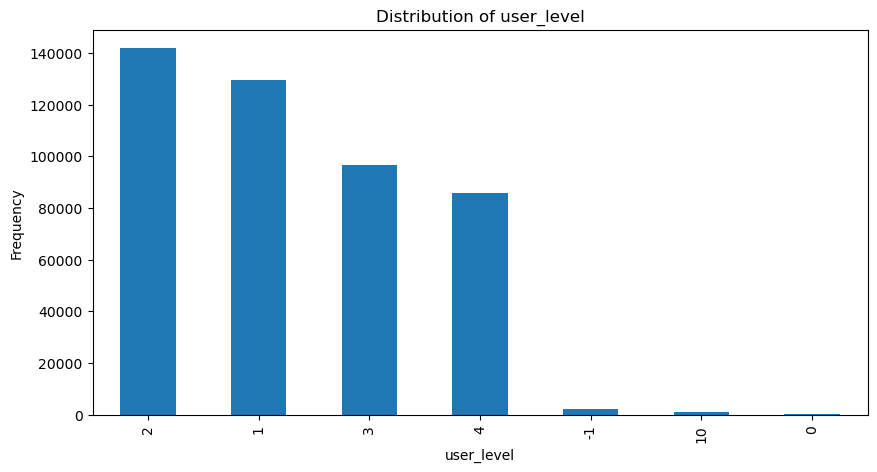

<Axes: >

Text(0.5, 0, 'plus')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of plus')

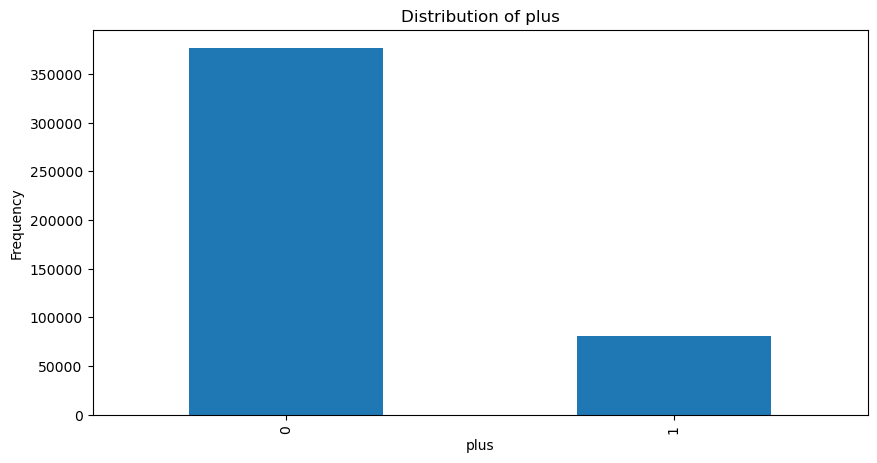

<Axes: >

Text(0.5, 0, 'gender')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of gender')

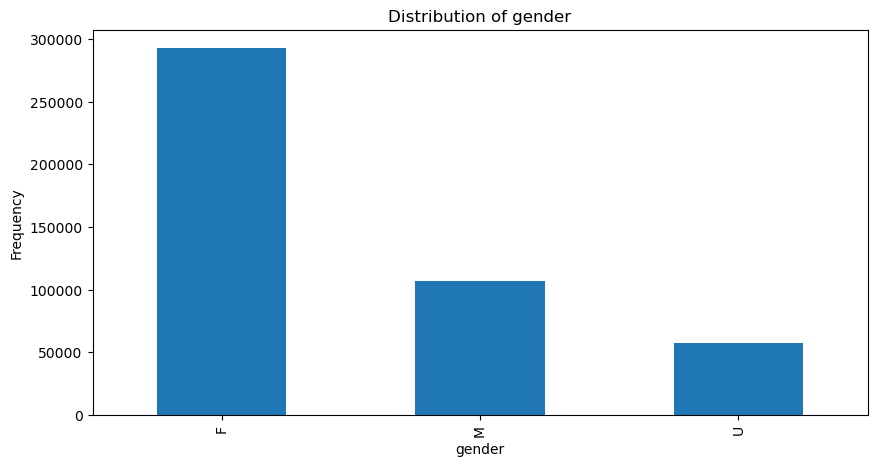

<Axes: >

Text(0.5, 0, 'age')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of age')

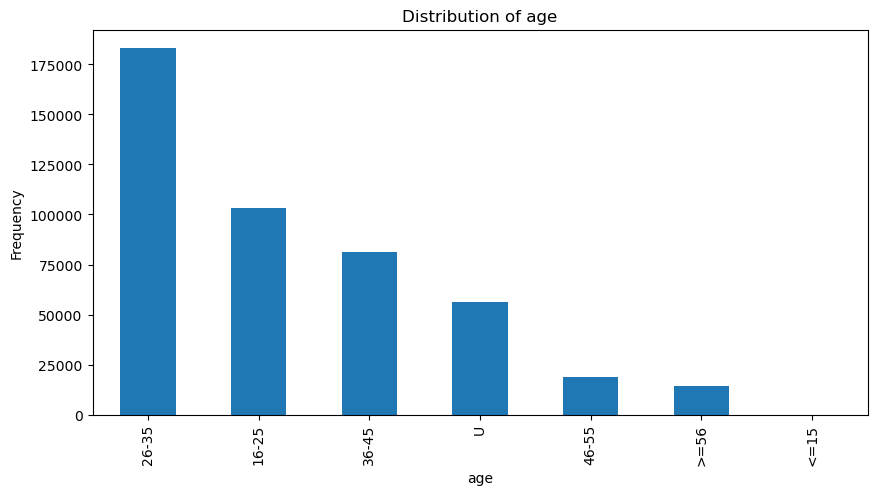

<Axes: >

Text(0.5, 0, 'marital_status')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of marital_status')

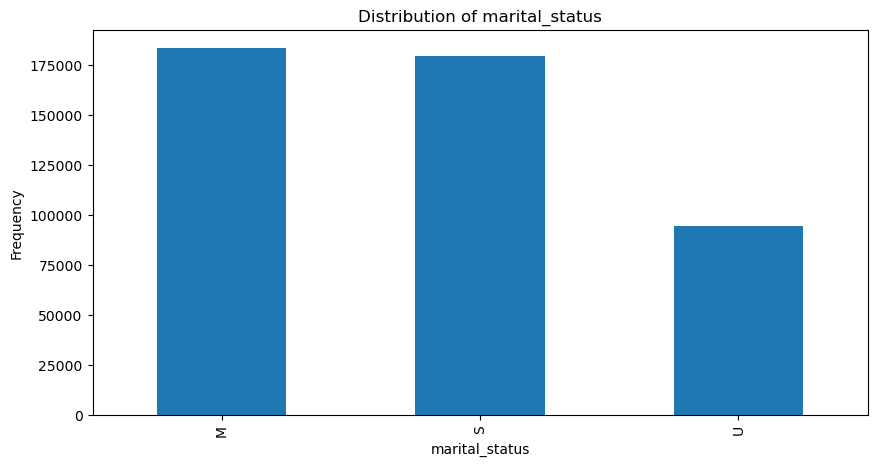

<Axes: >

Text(0.5, 0, 'education')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of education')

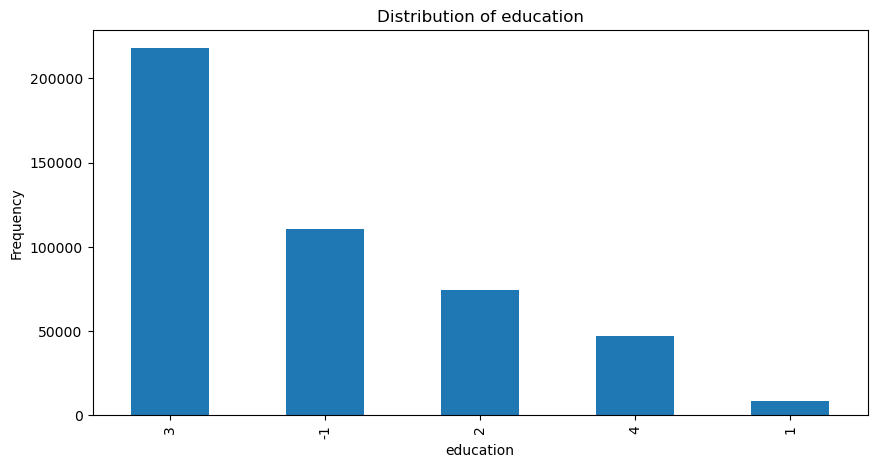

<Axes: >

Text(0.5, 0, 'city_level')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of city_level')

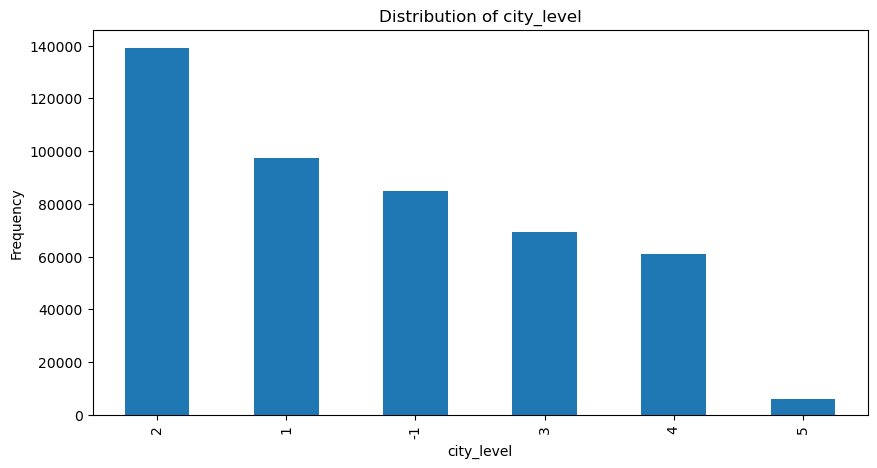

<Axes: >

Text(0.5, 0, 'purchase_power')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of purchase_power')

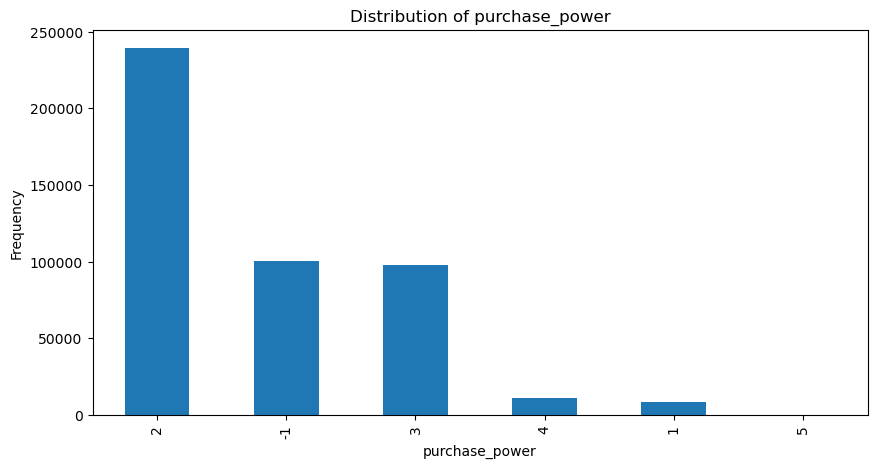

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
user = pd.read_csv("JD_user_data.csv")

columns_to_plot = ['user_level', 'plus', 'gender', 'age', 'marital_status', 'education', 'city_level', 'purchase_power']

for column in columns_to_plot:

    value_counts = user[column].value_counts()

   
    value_counts.plot(kind='bar', figsize=(10, 5))

    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')

    plt.show()


In [ ]:
The education level od majority is 3

In [ ]:
Age level of 26-35 have many users

25. Next we move to the table that resulted from Q11-Q15. Sum the quantity by day (we created this variable in Q14.) and save the results.
Create a line graph based on it. Hint: The outcome of the sum is a Pandas Series. Use the .index to get the day and .values to get the sum for the plot.<br>
Or you may use reset_index() to turn the results to a dataframe.
Which day has the most quantity sold? 

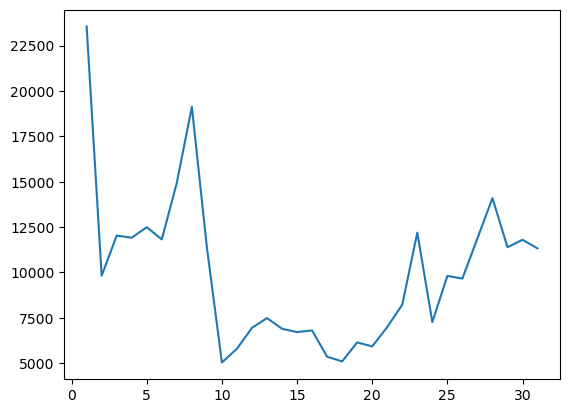

In [124]:
dailyq = merged_data_filtered_2.groupby('order_day')['quantity'].sum()
plt.plot(dailyq.index, dailyq.values) 

26. Repeat Q25 for variable 'order_hour' we created in Q14. When is the peak time for orders during a day? Can you describe the customer order trend over a day's time?

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Customer Order Trend Over a Day')

Text(0.5, 0, 'Hour of the Day')

Text(0, 0.5, 'Total Quantity Ordered')

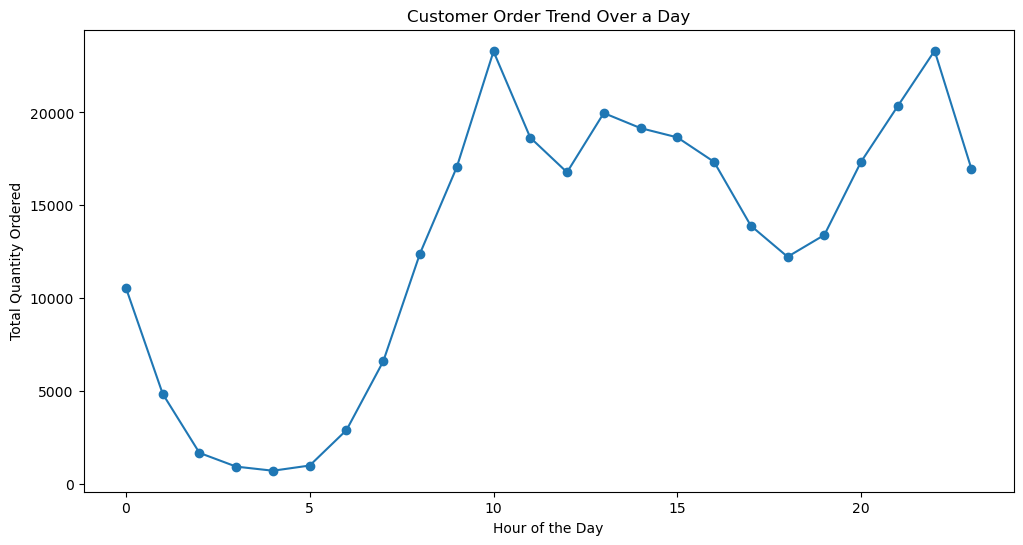

In [125]:

dailyh = merged_data_filtered_2.groupby('order_hour')['quantity'].sum()

plt.figure(figsize=(12, 6)) 
plt.plot(dailyh.index, dailyh.values, marker='o')  # Line plot with markers

plt.title('Customer Order Trend Over a Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Quantity Ordered')

plt.show()

27. Examine variable original_unit_price .<br>

1) Using describe() to check the stastitics. What is min, max and median?

In [126]:
statistics = merged_data_filtered_2['original_unit_price'].describe()

# Extract min, max, and median
min_value = statistics['min']
max_value = statistics['max']
median_value = statistics['50%']  # 50% corresponds to the median

# Print the results
print(f"Min: {min_value}")
print(f"Max: {max_value}")
print(f"Median: {median_value}")

Min: 4.0
Max: 7130.0
Median: 89.0


2) Find out the percentage of observations whose original_unit_price is greater than 350. Delete those observations using filtering. We will use the filtered dataset from now on.

In [127]:

# Calculate the percentage of observations with original_unit_price greater than 350
total_observations = len(merged_data_filtered_2)
percentage_above_350 = (len(merged_data_filtered_2[merged_data_filtered_2['original_unit_price'] > 350]) / total_observations) * 100

# Print the percentage
print(f"Percentage of observations with original_unit_price > 350: {percentage_above_350:.2f}%")

# Filter the DataFrame to keep only observations with original_unit_price <= 350
filtered_dataset = merged_data_filtered_2[merged_data_filtered_2['original_unit_price'] <= 350]

# Now you can use filtered_dataset for further analysis

Percentage of observations with original_unit_price > 350: 0.73%


3) Examine the distribution of original_unit_price, using bins range from 0 to 350, width 10. Which price range has the most orders?

The price range with the most orders is (70, 80]


C:\Users\home\AppData\Local\Temp\ipykernel_15280\28040161.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['price_range'] = pd.cut(filtered_dataset['original_unit_price'], bins=bins)


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 35 artists>

Text(0.5, 0, 'Price Range')

Text(0, 0.5, 'Number of Orders')

Text(0.5, 1.0, 'Distribution of Original Unit Price')

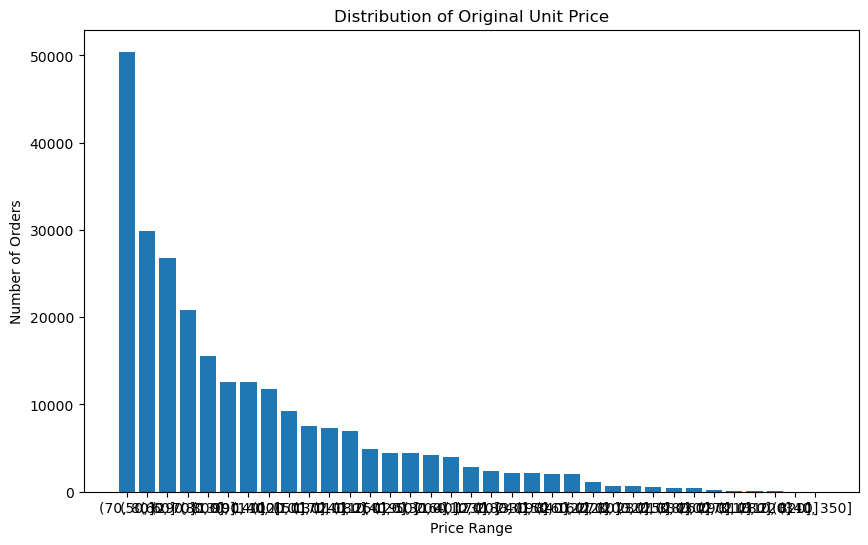

In [128]:
# Set up bins
bins = range(0, 360, 10)

# Create a new column 'price_range' to categorize original_unit_price into bins
filtered_dataset['price_range'] = pd.cut(filtered_dataset['original_unit_price'], bins=bins)

# Get the counts for each price range
price_range_counts = filtered_dataset['price_range'].value_counts()

# Find the price range with the most orders
most_orders_price_range = price_range_counts.idxmax()

# Print the result
print(f"The price range with the most orders is {most_orders_price_range}")

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(price_range_counts.index.astype(str), price_range_counts)
plt.xlabel('Price Range')
plt.ylabel('Number of Orders')
plt.title('Distribution of Original Unit Price')
plt.show()

28. Examine the distribution of final_unit_price, using bins range from -20 to 350, width 10. Comparing to original unit prices, how are the final prices different?

In [133]:
filtered_dataset.head()

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type_x,promise,original_unit_price,final_unit_price,...,package_ID,ship_out_time,arr_station_time,arr_time,order_day,order_hour,delivery_time,delivery_time_hours,price_range,sales
0,7444318d01,33a9e56257,067b673f2b,2018-03-01,11:10:40,1,1,2,99.9,53.9,...,7444318d01,13:00:00,08:00:00,14:00:00,1,11,0 days 00:00:00.000000002,0.000000e+00,"(90, 100]",53.9
1,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,09:13:26,1,1,2,78.0,58.5,...,f973b01694,14:00:00,09:00:00,13:00:00,1,9,0 days 00:00:00.000000003,0.000000e+00,"(70, 80]",58.5
2,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,21:29:50,1,1,2,61.0,35.0,...,8c1cec8d4b,09:00:00,08:00:00,11:00:00,1,21,-1 days +23:59:59.999999990,-2.777778e-10,"(60, 70]",35.0
3,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,19:13:37,1,1,1,78.0,53.0,...,d43a33c38a,20:00:00,07:00:00,11:00:00,1,19,-1 days +23:59:59.999999992,-2.777778e-10,"(70, 80]",53.0
4,e0f5386d87,0b07cae293,589c2b865b,2018-03-01,21:09:15,1,1,1,79.9,38.9,...,e0f5386d87,22:00:00,09:00:00,12:00:00,1,21,-1 days +23:59:59.999999991,-2.777778e-10,"(70, 80]",38.9


<Figure size 1200x600 with 0 Axes>

(array([0.0000e+00, 0.0000e+00, 1.2000e+01, 2.8460e+03, 1.0850e+03,
        4.1650e+03, 4.4820e+03, 2.9533e+04, 2.5908e+04, 4.9789e+04,
        1.7351e+04, 1.2361e+04, 6.8570e+03, 5.2530e+03, 9.7850e+03,
        1.2537e+04, 8.7910e+03, 5.0510e+03, 2.3470e+03, 8.1330e+03,
        2.8840e+03, 4.2180e+03, 5.9400e+02, 4.8100e+02, 4.3000e+01,
        2.3360e+03, 5.4900e+03, 2.3930e+03, 1.9130e+03, 2.2500e+02,
        2.3700e+02, 2.0378e+04, 8.4800e+02, 3.1000e+01, 5.0700e+02,
        2.1810e+03, 1.0000e+00]),
 array([-20., -10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,
         90., 100., 110., 120., 130., 140., 150., 160., 170., 180., 190.,
        200., 210., 220., 230., 240., 250., 260., 270., 280., 290., 300.,
        310., 320., 330., 340., 350.]),
 <BarContainer object of 37 artists>)

(array([0.0000e+00, 0.0000e+00, 3.9730e+03, 4.1660e+03, 8.8810e+03,
        3.0955e+04, 3.1537e+04, 3.7325e+04, 3.1149e+04, 1.6949e+04,
        8.4250e+03, 9.5160e+03, 9.8500e+03, 3.9250e+03, 9.0220e+03,
        4.0900e+03, 3.3400e+03, 3.6910e+03, 6.8740e+03, 1.4950e+03,
        1.6980e+03, 2.3620e+03, 7.6370e+03, 1.6830e+03, 7.0270e+03,
        1.8580e+03, 2.1020e+03, 5.9200e+02, 2.7400e+02, 1.8900e+02,
        1.2700e+02, 2.3200e+02, 7.1000e+01, 1.4000e+01, 5.0000e+00,
        1.2000e+01, 0.0000e+00]),
 array([-20., -10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,
         90., 100., 110., 120., 130., 140., 150., 160., 170., 180., 190.,
        200., 210., 220., 230., 240., 250., 260., 270., 280., 290., 300.,
        310., 320., 330., 340., 350.]),
 <BarContainer object of 37 artists>)

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Original and Final Unit Prices')

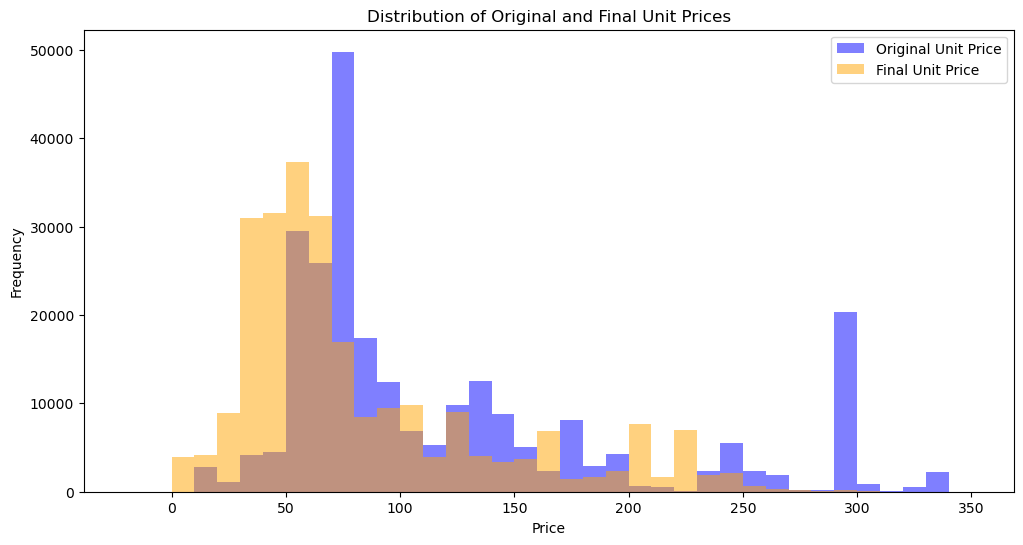

In [129]:
# Set up bins for both original and final unit prices
bins = range(-20, 360, 10)

# Plot histogram for original unit price
plt.figure(figsize=(12, 6))
plt.hist(filtered_dataset['original_unit_price'], bins=bins, alpha=0.5, label='Original Unit Price', color='blue')

# Plot histogram for final unit price
plt.hist(filtered_dataset['final_unit_price'], bins=bins, alpha=0.5, label='Final Unit Price', color='orange')

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Original and Final Unit Prices')
plt.legend()
plt.show()

29. Create a new variable 'sales', which is equal to the multiplication of quantity and final unit price. Make a graph for sales by day as in Q25.

     order_ID     user_ID      sku_ID order_date order_time  quantity  type_x  \
0  7444318d01  33a9e56257  067b673f2b 2018-03-01   11:10:40         1       1   
1  f973b01694  4ea3cf408f  623d0a582a 2018-03-01   09:13:26         1       1   
2  8c1cec8d4b  b87cb736cb  fc5289b139 2018-03-01   21:29:50         1       1   
3  d43a33c38a  4829223b6f  623d0a582a 2018-03-01   19:13:37         1       1   
4  e0f5386d87  0b07cae293  589c2b865b 2018-03-01   21:09:15         1       1   

  promise  original_unit_price  final_unit_price  ...  package_ID  \
0       2                 99.9              53.9  ...  7444318d01   
1       2                 78.0              58.5  ...  f973b01694   
2       2                 61.0              35.0  ...  8c1cec8d4b   
3       1                 78.0              53.0  ...  d43a33c38a   
4       1                 79.9              38.9  ...  e0f5386d87   

   ship_out_time  arr_station_time  arr_time  order_day  order_hour  \
0       13:00:00          0

C:\Users\home\AppData\Local\Temp\ipykernel_15280\2864720512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['sales'] = filtered_dataset['quantity'] * filtered_dataset['final_unit_price']


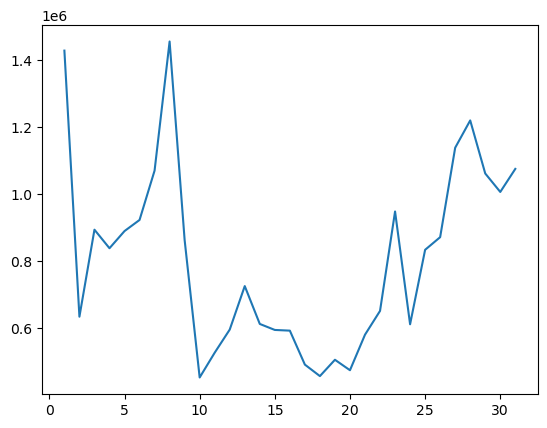

In [130]:
# Create a new variable 'sales' by multiplying 'quantity' and 'final_unit_price'
filtered_dataset['sales'] = filtered_dataset['quantity'] * filtered_dataset['final_unit_price']

# Print the DataFrame to verify the changes
print(filtered_dataset.head())

# Group by date and sum the sales for each day
daily_sales = filtered_dataset.groupby('order_day')['sales'].sum()

plt.plot(daily_sales.index, daily_sales.values)

30. Try to answer one descriptive question you asked in your project initial report.

          user_level           plus      education     city_level  \
count  457298.000000  457298.000000  457298.000000  457298.000000   
mean        2.305547       0.177031       1.938830       1.688945   
std         1.157647       0.381695       1.752484       1.608057   
min        -1.000000       0.000000      -1.000000      -1.000000   
25%         1.000000       0.000000       1.000000       1.000000   
50%         2.000000       0.000000       3.000000       2.000000   
75%         3.000000       0.000000       3.000000       3.000000   
max        10.000000       1.000000       4.000000       5.000000   

       purchase_power  
count   457298.000000  
mean         1.585170  
std          1.461573  
min         -1.000000  
25%          2.000000  
50%          2.000000  
75%          2.000000  
max          5.000000  


<BarContainer object of 6 artists>

Text(0.5, 0, 'City Level')

Text(0, 0.5, 'Total Purchase power')

Text(0.5, 1.0, 'Total Purchase power by City Level')

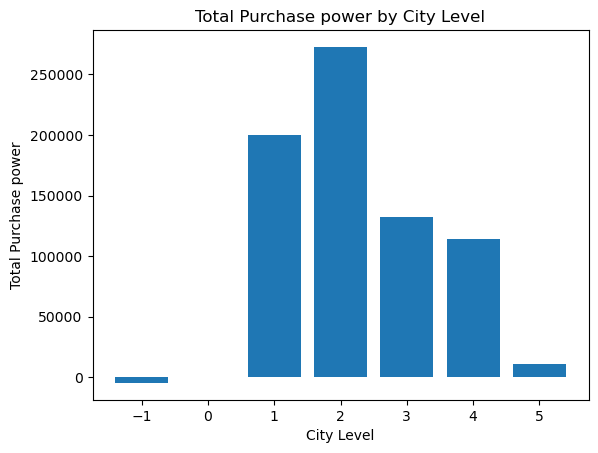

In [131]:
#How were customer purchases distributed throughout cities at different levels (city_level)? 
#Are there more users from higher city levels, or are there people from all city levels 
#represented fairly? (users) 
user = pd.read_csv("JD_user_data.csv")
print(user.describe())

# Group data by city level and calculate the total purchases in each level
city_level_purchases = user.groupby('city_level')['purchase_power'].sum().reset_index()

# Create a bar chart to visualize the distribution
plt.bar(city_level_purchases['city_level'], city_level_purchases['purchase_power'])
plt.xlabel('City Level')
plt.ylabel('Total Purchase power')
plt.title('Total Purchase power by City Level')
plt.show()

### Assignment 11 starts from here: Q31-Q40.
We only covered a small part of data exploration in Assignment 10. If you are interested, you can make many more graphs to understand the data. <br>
Next we intend to build models to predict delivery times.

We want to use two sets of features to make predictions.<br>
1. order effect: This class of predictors captures thevcharacteristics of an order that may impact deliveryvtime, such as the number of items (SKUs), order size (quantity), order type (1P or 3P), discount rate and the number of gift items.<br>
2. User effect: The process may prioritize certain customers over others, for example, customers with a PLUSmembership or higher past purchase values.<br>
Note: Actually, it will be better if we can include real-time workloads of distribution centers. It can be done with this dataset, but might be a little too much for us. So, we will leave that part out.

We need to further process the data to prepare the features.<br>
<b>Note: Here I have done this part. You need to change the name of DataFrame "order_delivery_inner' to your dataframe name that results from all the previous steps. Make sure you run the cells before you proceed.</b>

31. The dataset we have so far is based on order-items. Each row is an item in an order. Now we need to aggregate by order to match order information with delivery information. Afterwards, each row is about one delivery / one order because we have already removed orders that have multiple deliveries.

First, let's calculate order values by multiply price and quantity.

In [136]:
# Original value of items
merged_data_filtered_2['originValue'] = merged_data_filtered_2['original_unit_price'] \
                                        * merged_data_filtered_2['quantity']

# Final value of items                                    
merged_data_filtered_2['finalValue'] = merged_data_filtered_2['final_unit_price'] \
                                    * merged_data_filtered_2['quantity']                                   

Next we aggregate by each order. <br>
Please pay attention to the variable names. They should be consistent with yours. Make changes when necessary. <br>

Variables that are the same across one order:<br>
user_ID<br>
order type - type_x<br>
delivery time - delivery_time<br>
order day - order_day<br>
order hour - order_hour<br>
<br>
<br>
Variables to be aggregated across one order:<br>
sku_ID - to count to calculate the number of different products<br>
quantity - to sum to calculate the order size<br>
originValue - to sum to calculate sales value with the original price<br>
finalValue - to sum to calculate final sales value<br>
discount rate<br>
gift_item - to sum to calculate the number of gift items<br>

Therefore, we need to do the following:<br>

1. For variables that are the same across one order, we can use the 'first' method to keep the value in the groupby result.<br>
2. For variables to be aggregated, we specify aggregation for each of them.<br>
3. We can use a dictionary to put all actions together.

In [137]:
agg_dict = {
    'user_ID': 'first',
    'type_x': 'first',
    'delivery_time': 'first',
    'order_day': 'first',
    'order_hour':'first',
    'sku_ID': 'count',
    'quantity': 'sum',
    'originValue': 'sum',
    'finalValue': 'sum',
    'gift_item': 'sum'
}

order_agg = merged_data_filtered_2.groupby('order_ID').agg(agg_dict).reset_index()
order_agg.head()

,order_ID,user_ID,type_x,delivery_time,order_day,order_hour,sku_ID,quantity,originValue,finalValue,gift_item
0,0000095025,57648ed1fc,1,-1 days +23:59:59.999999999,19,11,1,1,230.0,176.2,0
1,00000e13eb,c113527e40,0,0 days 00:00:00.000000005,9,12,1,1,56.0,56.0,0
2,0000132b39,c4f5626c0d,1,-1 days +23:59:59.999999999,13,16,1,1,89.0,85.0,0
3,0000bde331,20d84fc11a,1,-1 days +23:59:59.999999998,17,14,1,1,59.9,39.9,0
4,00016f6069,77ea7842f4,1,-1 days +23:59:59.999999996,10,19,1,1,69.0,48.0,0


32. Merge user table with this aggregated order table.

In [171]:
user = pd.read_csv("JD_user_data.csv")
user.head()
user.info()
order_user = pd.merge(order_agg, user, on = 'user_ID', how = 'inner') 
order_user.head() 
order_user.info()

,user_ID,user_level,first_order_month,plus,gender,age,marital_status,education,city_level,purchase_power
0,000089d6a6,1,2017-08,0,F,26-35,S,3,4,3
1,0000babd1f,1,2018-03,0,U,U,U,-1,-1,-1
2,0000bc018b,3,2016-06,0,F,>=56,M,3,2,3
3,0000d0e5ab,3,2014-06,0,M,26-35,M,3,2,2
4,0000dce472,3,2012-08,1,U,U,U,-1,-1,-1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457298 entries, 0 to 457297
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_ID            457298 non-null  object
 1   user_level         457298 non-null  int64 
 2   first_order_month  457298 non-null  object
 3   plus               457298 non-null  int64 
 4   gender             457298 non-null  object
 5   age                457298 non-null  object
 6   marital_status     457298 non-null  object
 7   education          457298 non-null  int64 
 8   city_level         457298 non-null  int64 
 9   purchase_power     457298 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 34.9+ MB


,order_ID,user_ID,type_x,delivery_time,order_day,order_hour,sku_ID,quantity,originValue,finalValue,gift_item,user_level,first_order_month,plus,gender,age,marital_status,education,city_level,purchase_power
0,0000095025,57648ed1fc,1,-1 days +23:59:59.999999999,19,11,1,1,230.0,176.2,0,-1,2017-10,0,U,U,U,-1,-1,-1
1,00000e13eb,c113527e40,0,0 days 00:00:00.000000005,9,12,1,1,56.0,56.0,0,1,2017-08,0,U,U,U,-1,-1,-1
2,0000132b39,c4f5626c0d,1,-1 days +23:59:59.999999999,13,16,1,1,89.0,85.0,0,2,2016-06,0,F,16-25,S,3,2,1
3,0000bde331,20d84fc11a,1,-1 days +23:59:59.999999998,17,14,1,1,59.9,39.9,0,2,2016-03,0,F,26-35,M,3,-1,2
4,00016f6069,77ea7842f4,1,-1 days +23:59:59.999999996,10,19,1,1,69.0,48.0,0,1,2014-08,0,F,16-25,S,-1,2,3


<class 'pandas.core.frame.DataFrame'>
Int64Index: 252886 entries, 0 to 252885
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   order_ID           252886 non-null  object         
 1   user_ID            252886 non-null  object         
 2   type_x             252886 non-null  int64          
 3   delivery_time      252886 non-null  timedelta64[ns]
 4   order_day          252886 non-null  int64          
 5   order_hour         252886 non-null  int64          
 6   sku_ID             252886 non-null  int64          
 7   quantity           252886 non-null  int64          
 8   originValue        252886 non-null  float64        
 9   finalValue         252886 non-null  float64        
 10  gift_item          252886 non-null  int64          
 11  user_level         252886 non-null  int64          
 12  first_order_month  252886 non-null  object         
 13  plus               252886 non

33. We need to code a few more variables.

In [156]:
# First we remove the orders with originValue is 0
order_user = order_user[order_user['originValue'] != 0]

In [142]:
# Discount rate
order_user['dis_rate'] = (order_user['originValue'] - order_user['finalValue'])/order_user['originValue']
# order_hour coded to be busy vs. not busy
order_user['busy_hour'] = order_user['order_hour'].apply(lambda h: 1 if 8<=h<=22 else 0)

34. Prepare data for analysis. The target variable is 'delivery_time'.<br>
Features: 'type_x', 'sku_ID', 'quantity', 'finalValue', 'gift_item', 'plus', 'dis_rate', 'busy_hour'

In [175]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt

reference_time = order_user['delivery_time'].min()
order_user['delivery_time_numeric'] = (order_user['delivery_time'] - reference_time).dt.total_seconds()

y = order_user['delivery_time_numeric']

features = ['type_x', 'sku_ID', 'quantity', 'finalValue', 'gift_item', 'plus', 'dis_rate', 'busy_hour']
X = order_user[features]

35. Prepare the training and test datasets

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
X_train.shape
X_test.shape

(169433, 8)

(83453, 8)

36. Train a Decision Tree regression model.

In [177]:
regressorT = DecisionTreeRegressor(max_depth=20)
regressorT.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20)

37. Make predictions on the testing data.

In [178]:
y_predT = regressorT.predict(X_test)
y_test_numeric = y_test.to_numpy()

38. Evaluate the model using RMSE

In [179]:
rmse = sqrt(mean_squared_error(y_test_numeric, y_predT))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 6.613093397123416e-09


In [180]:
# To understand the RMSE, We check the statistics of the target variable.
order_user['delivery_time'].describe()
# It seems the mean is about 34 hours. With RMSE being about 27, 
# the prediction seems not very good.
# If you are interested to explore more, you may try some other prediction methods to see 
# whether you can get better results.

count                         252886
mean     -1 days +23:59:59.999999999
std        0 days 00:00:00.000000006
min      -1 days +23:59:59.999999977
25%      -1 days +23:59:59.999999994
50%      -1 days +23:59:59.999999998
75%        0 days 00:00:00.000000003
max        0 days 00:00:00.000000022
Name: delivery_time, dtype: object

In [188]:
#What is the average duration (ship_out_time) for packages to leave the warehouse once an
#order is placed? Is there a big difference in processing times between 1P and 3P orders?

# Calculate the difference
merged_data_filtered_2['ProcessingTime'] = merged_data_filtered_2['ship_out_datetime'] - merged_data_filtered_2['order_datetime']

# Calculate in days or hours
merged_data_filtered_2['ProcessingTimeDays'] = merged_data_filtered_2['ProcessingTime'].dt.days
merged_data_filtered_2['ProcessingTimeHours'] = merged_data_filtered_2['ProcessingTime'].dt.total_seconds() / 3600

# Calculate average processing time
avg_processing_time_days = merged_data_filtered_2['ProcessingTimeDays'].mean()
avg_processing_time_hours = merged_data_filtered_2['ProcessingTimeHours'].mean()

print(f"Average processing time in days: {avg_processing_time_days}")
print(f"Average processing time in hours: {avg_processing_time_hours}")


Average processing time in days: 0.0
Average processing time in hours: 5.804449389580023
